In [ ]:
# If needed !pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.1 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import csv
import os
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from googleapiclient.http import MediaIoBaseDownload

# Authenticate and create the PyDrive client
auth.authenticate_user()

# Create the Drive API service
drive_service = build('drive', 'v3')

def list_files_in_folder(service, folder_id):
    try:
        # List all files in the specified folder
        results = service.files().list(
            q=f"'{folder_id}' in parents",
            fields="nextPageToken, files(id, name, mimeType)"
        ).execute()

        items = results.get('files', [])

        if not items:
            print('No files found in the folder.')
        else:
            print('Files and folders in the folder:')
            for item in items:
                print(f'{item["name"]} ({item["id"]}) - {item["mimeType"]}')
    except HttpError as error:
        print(f'An error occurred: {error}')
        items = None

    return items

def process_csv(file_id, service):
    try:
        request = service.files().get_media(fileId=file_id)
        csv_path = f'/content/{file_id}.csv'
        with open(csv_path, 'wb') as file:
            downloader = MediaIoBaseDownload(file, request)
            done = False
            while not done:
                status, done = downloader.next_chunk()
                print(f'Download {int(status.progress() * 100)}%.')

        with open(csv_path, 'r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                try:
                    print(row['stim'], row['agree.response'], row['emotion'])
                except KeyError as e:
                    print(f"Column not found: {e}")
    except HttpError as error:
        print(f'An error occurred: {error}')

def find_and_process_csvs(service, folder_id):
    items = list_files_in_folder(service, folder_id)
    for item in items:
        if item['mimeType'] == 'application/vnd.google-apps.folder':
            find_and_process_csvs(service, item['id'])
        elif item['mimeType'] == 'text/csv':
            print(f'Processing file {item["name"]} ({item["id"]})')
            process_csv(item['id'], service)

# Specify the ID of the shared folder
folder_id = '1QLBrAlsjDKowTr3-__iId9-v9gbAI5PZ'

# Find and process all CSV files in the shared folder
find_and_process_csvs(drive_service, folder_id)


Files and folders in the folder:
main.ipynb (1myCYqF1yA20p8OG85Rz3BvBKqdBDJWs5) - application/vnd.google.colaboratory
162636 (13tf2HWk6eON_AEbnWcSyGdv33n-SH8FX) - application/vnd.google-apps.folder
859899 (1Nw455mzUbgE6b3W6GP85k0NeHNN2u4VF) - application/vnd.google-apps.folder
Zacker (1ifXKWy4i3paw3-GELvFX2Le6eaAvk5WD) - application/vnd.google-apps.folder
750667 (160PYuFTERKYIh9V6P-wck-4RBv24n63w) - application/vnd.google-apps.folder
919513 (1WlJgKWRR_oqC9ScQheRygaCHEBOFNTtK) - application/vnd.google-apps.folder
946416 (1QTOL9CFcrG-3OQjwTR-4s1vw_q60s7MI) - application/vnd.google-apps.folder
778279 (1VEzTnM-qnl_gHLvQcwXAowPyRvVpeMSE) - application/vnd.google-apps.folder
145098 (1DbGbpUVNltJnxc0KdcJshYX0XHSElSIQ) - application/vnd.google-apps.folder
825255 (1yr2kNWAnKQYx3k5FJb6xqzVC3U34FxCH) - application/vnd.google-apps.folder
901666 (1F7hK4nk0wT8FZ-YNz5_nPnlwji9TiYhZ) - application/vnd.google-apps.folder
103918 (1esw05TUq5TBtsUmmXaCMZoIkVdxHpCZ0) - application/vnd.google-apps.folder
22

<ipython-input-20-712302872cd6>:76: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50,picks=eeg_channels)


Files and folders in the folder:
859899.csv (17NveuMW9gcVBsq3q4IW0p098LzwINsh-) - text/csv
859899.edf (1IomsFvwQPZWOnbTnEBWkxt6zq2ZfDqNt) - application/octet-stream
Processing CSV file: 859899.csv (17NveuMW9gcVBsq3q4IW0p098LzwINsh-)
Download 100%.
  1 excited
  4 relaxed
  5 sad
  8 angry
  
  
videos\1 excited\3 general\ratatChaseScene.mp4 4.0 excited
videos\2 happy\scooby.mp4 4.0 happy
videos\3 motivated\motivationalAuthor.mp4 3.0 motivated
videos\4 relaxed\1 meditation\meditation.mp4 4.0 relaxed
videos\5 sad\2 babies\sadBaby1.mp4 4.0 sad
videos\6 horror\conjuring.mp4 4.0 horror
videos\7 disgusted\trainspotting.mp4 5.0 disgusted
videos\8 angry\2 general\thepiano.mp4 4.0 angry
Processing EDF file: 859899.edf (1IomsFvwQPZWOnbTnEBWkxt6zq2ZfDqNt)
Download 100%.
Extracting EDF parameters from /content/1IomsFvwQPZWOnbTnEBWkxt6zq2ZfDqNt.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF PATH:




 /content/1IomsFvwQPZWOnbTnEBWkxt6zq2ZfDqNt.edf
NOTE

<ipython-input-20-712302872cd6>:76: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50,picks=eeg_channels)


KeyboardInterrupt: 

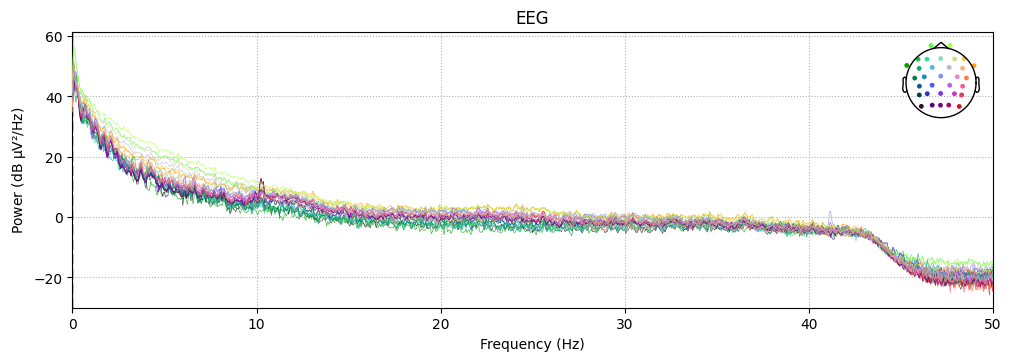

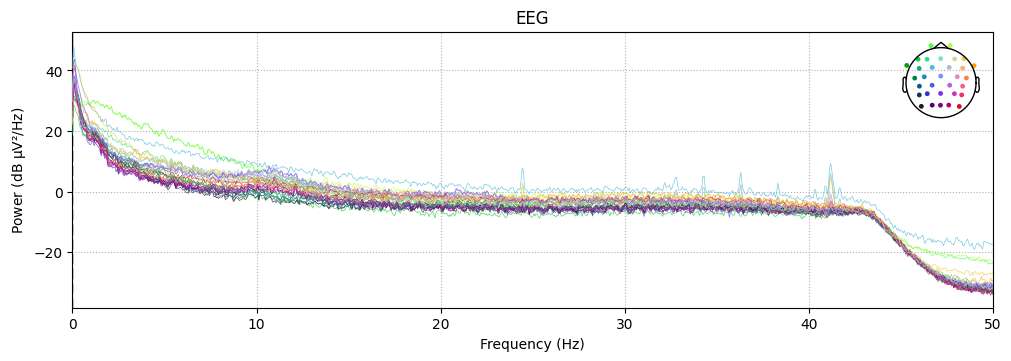

In [ ]:
# Import necessary libraries
import os
import numpy as np
import mne
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from googleapiclient.http import MediaIoBaseDownload

# Authenticate and create the Google Drive API service
auth.authenticate_user()
drive_service = build('drive', 'v3')
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

def list_files_in_folder(service, folder_id):
    try:
        # List all files in the specified folder
        results = service.files().list(
            q=f"'{folder_id}' in parents",
            fields="nextPageToken, files(id, name, mimeType)"
        ).execute()

        items = results.get('files', [])

        if not items:
            print('No files found in the folder.')
        else:
            print('Files and folders in the folder:')
            for item in items:
                print(f'{item["name"]} ({item["id"]}) - {item["mimeType"]}')
    except HttpError as error:
        print(f'An error occurred: {error}')
        items = None

    return items

def process_csv(file_id, service):
    try:
        request = service.files().get_media(fileId=file_id)
        csv_path = f'/content/{file_id}.csv'
        with open(csv_path, 'wb') as file:
            downloader = MediaIoBaseDownload(file, request)
            done = False
            while not done:
                status, done = downloader.next_chunk()
                print(f'Download {int(status.progress() * 100)}%.')

        with open(csv_path, 'r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                try:
                    print(row['stim'], row['agree.response'], row['emotion'])
                except KeyError as e:
                    print(f"Column not found: {e}")
    except HttpError as error:
        print(f'An error occurred: {error}')

def process_edf(file_id, service):
    try:
        request = service.files().get_media(fileId=file_id)
        edf_path = f'/content/{file_id}.edf'
        with open(edf_path, 'wb') as file:
            downloader = MediaIoBaseDownload(file, request)
            done = False
            while not done:
                status, done = downloader.next_chunk()
                print(f'Download {int(status.progress() * 100)}%.')

        # Load .edf file using MNE
        raw = mne.io.read_raw_edf(edf_path)
        print('EDF PATH:\n\n\n\n\n',edf_path)
        raw.pick_types(eeg=True)
        montage = mne.channels.make_standard_montage('standard_1020')
        raw.set_montage(montage, on_missing='ignore')
        # Plot PSD
        raw.plot_psd(fmax=50,picks=eeg_channels)
    except HttpError as error:
        print(f'An error occurred: {error}')

def find_and_process_files(service, folder_id):
    items = list_files_in_folder(service, folder_id)
    for item in items:
        if item['mimeType'] == 'application/vnd.google-apps.folder':
            find_and_process_files(service, item['id'])
        elif item['mimeType'] == 'text/csv':
            print(f'Processing CSV file: {item["name"]} ({item["id"]})')
            process_csv(item['id'], service)
        elif item['mimeType'] == 'application/octet-stream':
            print(f'Processing EDF file: {item["name"]} ({item["id"]})')
            process_edf(item['id'], service)

# Specify the ID of the shared folder
folder_id = '1QLBrAlsjDKowTr3-__iId9-v9gbAI5PZ'

# Find and process all files in the shared folder
find_and_process_files(drive_service, folder_id)


In [ ]:
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']
# Read your EDF file
raw = mne.io.read_raw_edf(r'/content/1IomsFvwQPZWOnbTnEBWkxt6zq2ZfDqNt.edf', preload=True, verbose=True, infer_types=True)#, infer_types=True, include=eeg_channels
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine="mean")

Extracting EDF parameters from /content/1IomsFvwQPZWOnbTnEBWkxt6zq2ZfDqNt.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 135551  =      0.000 ...  1058.992 secs...


ValueError: Unable to generate artificial ECG channel

In [ ]:
raw = mne.io.read_raw_edf(r'/content/1IomsFvwQPZWOnbTnEBWkxt6zq2ZfDqNt.edf', preload=True, verbose=True, infer_types=True)#, infer_types=True, include=eeg_channels
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine="mean")
eog_epochs.average().plot_joint()

Extracting EDF parameters from /content/1IomsFvwQPZWOnbTnEBWkxt6zq2ZfDqNt.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 135551  =      0.000 ...  1058.992 secs...


RuntimeError: No EOG channel(s) found